# Supervised Learning- Classification

Problem Description

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out the accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

Sepal Length

Sepal Width

Petal length

Petal width

Using above 4 features you will classify a flower in one of the three categories,

Setosa

Versicolour

Virginica

In [97]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [73]:
#Load the dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [74]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [75]:
# feature names (variable names)
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# independed variable
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [77]:
iris_data= pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [78]:
iris_data['Iris category'] = iris['target']

In [79]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Also lets assign its species name

In [80]:
iris_data['Species'] = iris_data['Iris category'].apply(lambda x: 'sentosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))
#iris_data['Species'] = iris['target']

In [81]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris category,Species
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


In [82]:
iris_data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris category,Species
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [83]:
print("No of rows:",iris_data.shape[0])
print("No of columns:",iris_data.shape[1])

No of rows: 150
No of columns: 6


In [84]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris category      150 non-null    int32  
 5   Species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [85]:
# To display no of samples in each species
iris_data['Species'].value_counts()

Species
sentosa       50
versicolor    50
virginica     50
Name: count, dtype: int64

# Data cleaning

In [86]:
iris_data.drop(columns='Iris category',inplace=True)

In [87]:
print("No of rows:",iris_data.shape[0])
print("No of columns:",iris_data.shape[1])

No of rows: 150
No of columns: 5


In [88]:
iris_data[iris_data.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
142,5.8,2.7,5.1,1.9,virginica


In [89]:
iris_data.drop_duplicates(inplace=True)
iris_data[iris_data.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species


# Data Preprocessing

In [90]:
#Checking the null values
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

There are no null values present in this dataset

In [91]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
iris_data['Species']=Label.fit_transform(iris_data['Species'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting the dataset into training set and testing set

In [92]:
from sklearn.model_selection import train_test_split
x=iris_data.drop(columns=['Species'])
y=iris_data['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

Out of 100% dataset, 70% dataset for training and remaining 30% for testing.

# Logistic Regression

In [93]:
#import model
from sklearn.linear_model import LogisticRegression
#Fit the model
LR=LogisticRegression()
LR.fit(x_train,y_train)

C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
y_predicted = LR.predict(x_test)
LR.predict_proba(x_test)

array([[3.26272117e-02, 9.43199568e-01, 2.41732204e-02],
       [9.62279507e-01, 3.77203731e-02, 1.19990852e-07],
       [9.56062118e-01, 4.39374877e-02, 3.94718144e-07],
       [1.28077765e-03, 6.01062608e-01, 3.97656615e-01],
       [2.82316788e-06, 2.64315392e-02, 9.73565638e-01],
       [4.49794633e-05, 3.88999225e-02, 9.61055098e-01],
       [8.31784957e-06, 2.43382235e-02, 9.75653459e-01],
       [9.65032895e-01, 3.49669604e-02, 1.44807743e-07],
       [4.69683740e-06, 1.09918445e-02, 9.89003459e-01],
       [9.30930055e-01, 6.90695109e-02, 4.34407371e-07],
       [8.57568785e-03, 6.43288403e-01, 3.48135909e-01],
       [2.86751684e-03, 5.16431621e-01, 4.80700862e-01],
       [4.72367975e-03, 7.89006400e-01, 2.06269920e-01],
       [9.77237288e-01, 2.27626453e-02, 6.65022924e-08],
       [6.70871135e-04, 2.69162421e-01, 7.30166708e-01],
       [4.57357595e-03, 8.82570244e-01, 1.12856180e-01],
       [9.64070974e-01, 3.59288894e-02, 1.36349858e-07],
       [3.93589529e-03, 7.88806

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

In [96]:
y_predicted

array([1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0,
       2])

In [98]:
print("Score :",LR.score(x_test,y_test))
print("Accuracy_score :",accuracy_score(y_test,y_predicted))
print('Confusion Matrix:', confusion_matrix(y_test,y_predicted))
print('F1 score:', f1_score(y_test,y_predicted, average='macro'))
print('Classification Report:',classification_report(y_test,y_predicted))

Score : 0.9555555555555556
Accuracy_score : 0.9555555555555556
Confusion Matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  2 14]]
F1 score: 0.952136752136752
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



# Decision Tree Classifier

In [99]:
#Import the model
from sklearn.tree import DecisionTreeClassifier
#Fit the model
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [100]:
DTC_y_pred=DTC.predict(x_test)
DTC_y_pred

array([1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       2])

In [101]:
print('Score:',DTC.score(x_test,y_test))
print("Accuracy_score :",accuracy_score(y_test,DTC_y_pred))
print('F1 score : ',f1_score(y_test, DTC_y_pred, average='macro'))
print("confusion_matrix:",confusion_matrix(y_test,DTC_y_pred), ['sentosa', 'versicolor', 'virginica'])
print(classification_report(y_test,DTC_y_pred))

Score: 0.9333333333333333
Accuracy_score : 0.9333333333333333
F1 score :  0.9284802043422733
confusion_matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  3 13]] ['sentosa', 'versicolor', 'virginica']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89        12
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



# Decision Tree Classifier with Parameter Tuning

In [102]:
#pre-pruning
parameter={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
    'splitter':['best', 'random']
}
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(DTC,parameter,scoring='accuracy')
cv.fit(x_train,y_train)

C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [103]:
best_model=cv.best_estimator_
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [104]:
#Post Pruning
#model=DecisionTreeClassifier()
from sklearn import tree
path = DTC.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

[0.         0.0093149  0.01824458 0.28453434 0.32547244]


In [105]:
DTC_pred = best_model.predict(x_test)
DTC_pred

array([1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       2])

In [106]:
print("score:",best_model.score(x_test,y_test))
print("Accuracy score:",accuracy_score(y_test,DTC_pred))
print('F1 score :', f1_score(y_test,DTC_pred, average='macro'))
print('Confusion Matrix:', confusion_matrix(y_test, DTC_pred))
print('Classification Report :', classification_report(y_test, DTC_pred))

score: 0.9333333333333333
Accuracy score: 0.9333333333333333
F1 score : 0.9284802043422733
Confusion Matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  3 13]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89        12
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



# K-Nearest Neighbor

In [107]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [108]:
KNN_y_pred=DTC.predict(x_test)
KNN_y_pred

array([1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       2])

In [109]:
print('Score:',KNN.score(x_test,y_test))
print('Accuracy score:',accuracy_score(y_test,KNN_y_pred))
print('F1 score : ',f1_score(y_test,KNN_y_pred, average='macro'))
print("confusion_matrix:",confusion_matrix(y_test,KNN_y_pred), ['sentosa', 'versicolor', 'virginica'])
print(classification_report(y_test,KNN_y_pred))

Score: 0.9555555555555556
Accuracy score: 0.9333333333333333
F1 score :  0.9284802043422733
confusion_matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  3 13]] ['sentosa', 'versicolor', 'virginica']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89        12
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



# KNN with Parameter Tuning

In [110]:
from sklearn.neighbors import KNeighborsClassifier
param_grid ={
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance',None],  
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
KNN = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance', None]},
             scoring='accuracy')

In [111]:
best_params = grid_search.best_params_
print("Best Number of Neighbors:", best_params['n_neighbors'])
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy with Best Model: {accuracy:.2f}')
print('F1 score:', f1_score(y_test,y_pred, average='macro'))
print('Confusion Matrix:', confusion_matrix(y_test,y_pred))
print(' Classification Report:', classification_report(y_test,y_pred))

Best Number of Neighbors: 7
Accuracy with Best Model: 0.96
F1 score: 0.9513888888888888
Confusion Matrix: [[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]
 Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [113]:
RF_y_pred=DTC.predict(x_test)
RF_y_pred

array([1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       2])

In [114]:
print("Score:",RF.score(x_test,y_test))
print('Accuracy score:',DTC.score(x_test,y_test))
print('F1 score : ',f1_score(y_test,RF_y_pred, average='macro'))
print("confusion_matrix:",confusion_matrix(y_test,RF_y_pred), ['sentosa', 'versicolor', 'virginica'])
print(classification_report(y_test,RF_y_pred))

Score: 0.9333333333333333
Accuracy score: 0.9333333333333333
F1 score :  0.9284802043422733
confusion_matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  3 13]] ['sentosa', 'versicolor', 'virginica']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89        12
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



# Random Forest Classifier with Parameter Tuning

In [116]:
parameter={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':np.arange(2,10,2),
    'max_features':[None,'sqrt','log2'],
    "bootstrap": [True, False]
    }

RF= RandomForestClassifier()

cv=GridSearchCV(RF,parameter,scoring='accuracy')
cv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([2, 4, 6, 8]),
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [117]:
print ('Random grid: ',parameter)
best_params = cv.best_params_
print ('Best Parameters: ',best_params)
best_f1_score =cv.best_score_
print("Best F1 Score:", best_f1_score)
best_model =cv.best_estimator_
best_model.fit(x_train,y_train)
RF_pred=best_model.predict(x_test)
print('Score:',best_model.score(x_test,y_test))
print('Accuracy score:',accuracy_score(y_test,RF_pred))
print('Confusion Matrix:', confusion_matrix(y_test,RF_pred))
print('Classification Report :',classification_report(y_test,RF_pred))

Random grid:  {'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': array([2, 4, 6, 8]), 'max_features': [None, 'sqrt', 'log2'], 'bootstrap': [True, False]}
Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10}
Best F1 Score: 0.9619047619047618
Score: 0.9111111111111111
Accuracy score: 0.9111111111111111
Confusion Matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  4 12]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.75      1.00      0.86        12
           2       1.00      0.75      0.86        16

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.90        45
weighted avg       0.93      0.91      0.91        45



# Ada Boost Classifier

In [118]:
from sklearn.ensemble import AdaBoostClassifier
Adaboost=AdaBoostClassifier()
Adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [119]:
Adaboost_pred=Adaboost.predict(x_test)
print("Score:",Adaboost.score(x_test,y_test))
print("Accuracy score:",accuracy_score(y_test,Adaboost_pred))
print("F1 Sore:",f1_score(y_test,Adaboost_pred,average='macro'))
print("confusion matrix:",confusion_matrix(y_test,Adaboost_pred))
print("Classification Report:",classification_report(y_test,Adaboost_pred))

Score: 0.9333333333333333
Accuracy score: 0.9333333333333333
F1 Sore: 0.9284802043422733
confusion matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  3 13]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89        12
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



# Gradient Boosting Classifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
Grboost=GradientBoostingClassifier()
Grboost.fit(x_train,y_train)

GradientBoostingClassifier()

In [121]:
Grboost_pred=Grboost.predict(x_test)
print('Score:',Grboost.score(x_test,y_test))
print('Accuracy score:',accuracy_score(y_test,Grboost_pred))
print('F1 Score:',f1_score(y_test,Grboost_pred,average='macro'))
print('Confusion matrix:',confusion_matrix(y_test,Grboost_pred))
print('Classification report:',classification_report(y_test,Grboost_pred))

Score: 0.9333333333333333
Accuracy score: 0.9333333333333333
F1 Score: 0.9284802043422733
Confusion matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  3 13]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89        12
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



# XGB Classifier Model

In [122]:
import xgboost as xgb
XGB=xgb.XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [123]:
XGB_pred=XGB.predict(x_test)
print('score:',XGB.score(x_test,y_test))
print('Accuracy score:',accuracy_score(y_test,XGB_pred))
print('F1 score:',f1_score(y_test,XGB_pred,average='macro'))
print('Confusion matrix:',confusion_matrix(y_test,XGB_pred))
print('Classification report',classification_report(y_test,XGB_pred))

score: 0.9333333333333333
Accuracy score: 0.9333333333333333
F1 score: 0.9284802043422733
Confusion matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  3 13]]
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.80      1.00      0.89        12
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



# Support vector classifier

In [124]:
from sklearn.svm import SVC
SV=SVC(kernel = 'rbf', C = 3)
SV.fit(x_train,y_train)

SVC(C=3)

In [125]:
SV_pred=SV.predict(x_test)
print("Score:",SV.score(x_test,y_test))
print("Accuracy score",accuracy_score(y_test,SV_pred))
print("F1 score:",f1_score(y_test,SV_pred,average='macro'))
print('Confusion matrix:',confusion_matrix(y_test,SV_pred))
print('Classification report:',classification_report(y_test,SV_pred))

Score: 0.9555555555555556
Accuracy score 0.9555555555555556
F1 score: 0.952136752136752
Confusion matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  2 14]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



# Support vector classifier with Parameter Tuning

In [126]:
param_grid = {
    'C': [0.1, 1, 3, 10],          
    'gamma': [0.001, 0.01, 0.1],  
}
grid_search = GridSearchCV(estimator=SV, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_f1_score = grid_search.best_score_
print("Best F1 Score:", best_f1_score)
best_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 3, 'gamma': 0.1}
Best F1 Score: 0.9821428571428571


In [127]:
SV_y_pred=grid_search.predict(x_test)
print("Score:",grid_search.score(x_test,y_test))
print("Accuracy score",accuracy_score(y_test,SV_y_pred))
print("F1 score:",f1_score(y_test,SV_y_pred,average='macro'))
print('Confusion matrix:',confusion_matrix(y_test,SV_y_pred))
print('Classification report:',classification_report(y_test,SV_y_pred))

Score: 0.952136752136752
Accuracy score 0.9555555555555556
F1 score: 0.952136752136752
Confusion matrix: [[17  0  0]
 [ 0 12  0]
 [ 0  2 14]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



# Unsupervised Learning algorithm

In [128]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data= pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
iris_data['Iris category'] = iris['target']
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# K-Means Clustering

In [129]:
from sklearn.cluster import KMeans
wcss = []
k_range=range(1,10)
for k in k_range:
    kmeans=KMeans(n_clusters=k)

    kmeans.fit(iris_data)

    wcss.append(kmeans.inertia_)

C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

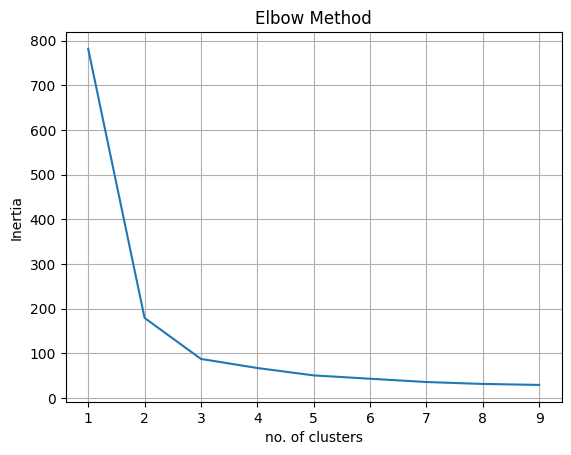

In [130]:
plt.plot(k_range,wcss)
plt.title("Elbow Method")
plt.xlabel("no. of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [131]:
model=KMeans(n_clusters=3)
model.fit(iris_data)
iris_data.target=model.labels_#species is the target
df1=iris_data[iris_data.target==0]
df2=iris_data[iris_data.target==1]
df3=iris_data[iris_data.target==2]
model.cluster_centers_ 

C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ano_k\AppData\Local\Temp\ipykernel_29208\1758410162.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  iris_data.target=model.labels_#species is the target


array([[5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784]])

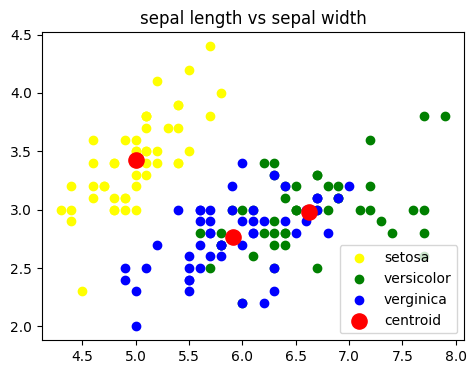

In [132]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(df1[['sepal length (cm)']],df1[['sepal width (cm)']],color="yellow",label="setosa")
plt.scatter(df2[['sepal length (cm)']],df2[['sepal width (cm)']],color="green",label="versicolor")
plt.scatter(df3[['sepal length (cm)']],df3[['sepal width (cm)']],color="blue",label="verginica")
plt.scatter(model.cluster_centers_[:,[0]],model.cluster_centers_[:,[1]],s=120,color="red",label="centroid")
plt.title('sepal length vs sepal width')
plt.legend()

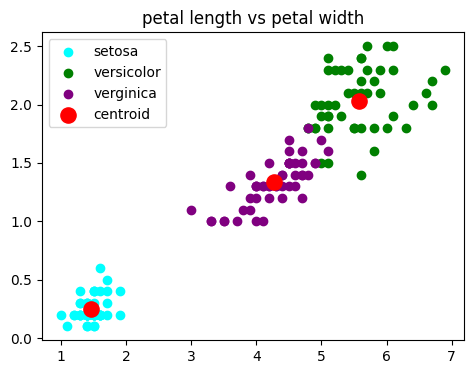

In [133]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']],color="cyan",label="setosa")
plt.scatter(df2[['petal length (cm)']],df2[['petal width (cm)']],color="green",label="versicolor")
plt.scatter(df3[['petal length (cm)']],df3[['petal width (cm)']],color="purple",label="verginica")
plt.scatter(model.cluster_centers_[:,[2]],model.cluster_centers_[:,[3]],s=120,color="red",label="centroid")
plt.title('petal length vs petal width')
plt.legend()

# Hierarchical Clustering

In [134]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(iris_data)

In [135]:
n_clusters = 3 
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
agg_cluster.fit(data_scaled)
iris_data['Cluster'] = agg_cluster.labels_
pred =agg_cluster .fit_predict(iris_data)

print('silhouette_score:',silhouette_score(iris_data,pred))

silhouette_score: 0.6664318214723987


Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

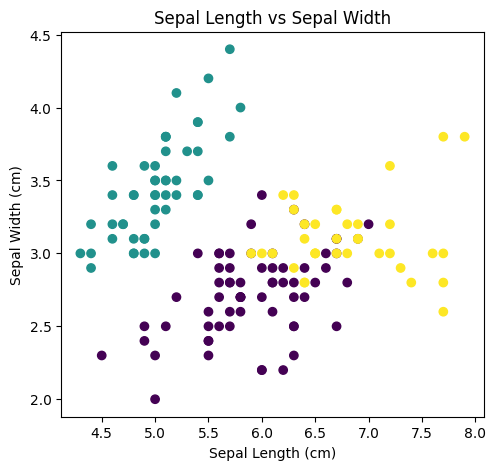

In [136]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1)
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], c=iris_data['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

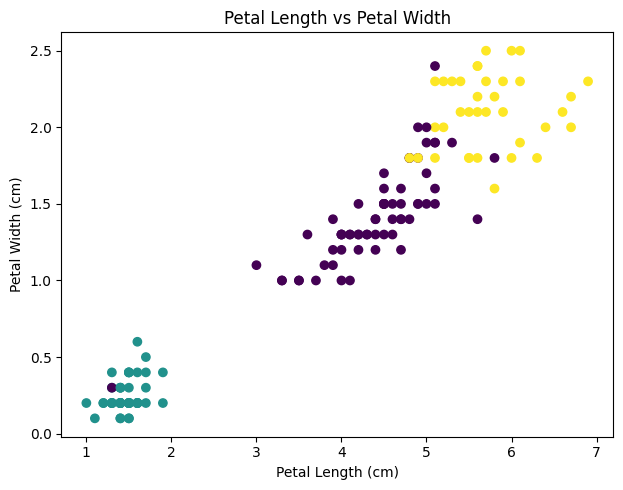

In [137]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 2)
plt.scatter(iris_data['petal length (cm)'],iris_data['petal width (cm)'], c=iris_data['Cluster'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()